### 목표
- 손글씨를 분류하는 모델을 만들어보자
- 예측의 불확실성을 확인해보자
- 이미지 데이터에 형태를 이해
- 다양한 분류평가지표를 이해하자

### 데이터 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
digit_train = pd.read_csv("./data/digit_train.csv")
digit_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
digit_train.shape

(42000, 785)

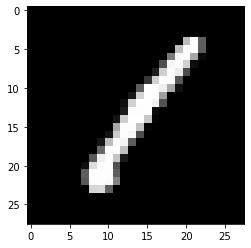

In [4]:
# 이미지 확인
img = digit_train.iloc[0,1:]
img_reshape = img.values.reshape(28,28)
plt.imshow(img_reshape, cmap='gray')

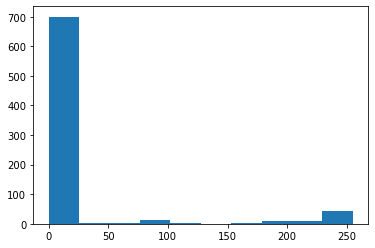

In [5]:
# 데이터 분포 확인
plt.hist(img)
plt.show()

In [6]:
# 손글씨(정답) 종류
digit_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

#### 훈련용 데이터와 검증용 데이터 분리

In [7]:
X = digit_train.iloc[:,1:]
y = digit_train.iloc[:,0]

In [8]:
X_train,X_val,y_train,y_val = train_test_split(X, y, random_state=728, test_size=0.3)

In [9]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((29400, 784), (29400,), (12600, 784), (12600,))

#### 모델링
- KNN
- DecisionTree
- LogisticRegression
- SVM

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC   # 분류형 SVM 모델
from sklearn.linear_model import SGDClassifier  # 경사하강법 적용 선형분류모델

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("knn 모델 결과 : ", knn_model.score(X_val,y_val))

knn 모델 결과 :  0.9671428571428572


In [17]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
print("tree 모델 결과 :", tree_model.score(X_val, y_val))

tree 모델 결과 : 0.8457142857142858


In [18]:
logi_model = LogisticRegression()
logi_model.fit(X_train, y_train)
print("logi 모델 결과 : ", logi_model.score(X_val,y_val))

logi 모델 결과 :  0.9137301587301587


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)
print("svc 모델 결과 : ", svc_model.score(X_val,y_val))

svc 모델 결과 :  0.8564285714285714


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [20]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
print("sgd 모델 결과 : ", sgd_model.score(X_val,y_val))

sgd 모델 결과 :  0.8807936507936508


#### 교차검증 활용 점수 확인

In [18]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn_model,X,y,cv=3)
print("교차검증점수 :", score)

교차검증점수 : [0.96457143 0.96328571 0.96478571]


In [25]:
score2 = cross_val_score(tree_model,X,y,cv=3)
print("교차검증점수 :", score2)

교차검증점수 : [0.84707143 0.84228571 0.84507143]


In [26]:
score3 = cross_val_score(logi_model,X,y,cv=3)
print("교차검증점수 :", score3)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

교차검증점수 : [0.91385714 0.91185714 0.91271429]


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
score4 = cross_val_score(svc_model,X,y,cv=3)
print("교차검증점수 :", score4)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


교차검증점수 : [0.81857143 0.88121429 0.85878571]


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [28]:
score5 = cross_val_score(sgd_model,X,y,cv=3)
print("교차검증점수 :", score5)

교차검증점수 : [0.88492857 0.88657143 0.88664286]


In [29]:
print("knn 모델 결과 : ", score.mean())
print("tree 모델 결과 : ", score2.mean())
print("logi 모델 결과 : ", score3.mean())
print("svc 모델 결과 : ", score4.mean())
print("sgd 모델 결과 : ", score5.mean())

knn 모델 결과 :  0.9642142857142857
tree 모델 결과 :  0.8448095238095238
logi 모델 결과 :  0.9128095238095238
svc 모델 결과 :  0.8528571428571429
sgd 모델 결과 :  0.8860476190476191


#### 스케일링
- minmax 스케일러 활용

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()   # 스케일러 객체생성
scaler.fit(X)    # 스케일링 기준값 찾기

MinMaxScaler()

In [21]:
X_scaled = scaler.transform(X)    # 스케일링 실시

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5)
tree_model = DecisionTreeClassifier()
logi_model = LogisticRegression()
svc_model = LinearSVC()
sgd_model = SGDClassifier()

In [24]:
knn_score = cross_val_score(knn_model,X_scaled,y,cv=3,n_jobs=-1)
tree_score = cross_val_score(tree_model,X_scaled,y,cv=3,n_jobs=-1)
logi_score = cross_val_score(logi_model,X_scaled,y,cv=3,n_jobs=-1)
svc_score = cross_val_score(svc_model,X_scaled,y,cv=3,n_jobs=-1)
sgd_score = cross_val_score(sgd_model,X_scaled,y,cv=3,n_jobs=-1)
print("knn 모델 결과 : ", knn_score.mean())
print("tree 모델 결과 : ", tree_score.mean())
print("logi 모델 결과 : ", logi_score.mean())
print("svc 모델 결과 : ", svc_score.mean())
print("sgd 모델 결과 : ", sgd_score.mean())

KeyboardInterrupt: 

### 예측의 불확실성 확인
- 분류모델들은 예측 결과를 정하기전에 항상 확률을 계산한다.
- 분류모델이 예측한 값이 같더라도 확신의 정도(불확실성)가 전부 다르다.

In [25]:
logi_model = LogisticRegression()
logi_model.fit(X_train,y_train)
pre = logi_model.predict(X_val)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
pre

array([7, 8, 0, ..., 1, 8, 6], dtype=int64)

In [27]:
pre_proba = logi_model.predict_proba(X_val)
pre_proba[8000]

array([6.05387130e-12, 2.41858851e-16, 4.52876112e-14, 3.44833211e-12,
       9.99997780e-01, 2.33325861e-09, 1.96816377e-09, 6.96488330e-11,
       1.56796403e-08, 2.19974752e-06])

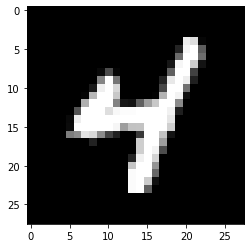

In [28]:
plt.imshow(X_val.iloc[8000].values.reshape(28,28), cmap='gray')

### 모델 평가
- 정확도
- 오차행렬
- 정밀도
- 재현율
- F1 스코어
- ROC AUC

In [34]:
from sklearn.metrics import confusion_matrix  # 오차행렬
from sklearn.metrics import classification_report   # 분류평가지표를 리포팅

In [36]:
# confusion_matrix(실제정답, 예측값)
confusion_matrix(y_val, pre)

array([[1160,    1,    2,    4,    0,    7,   14,    4,    2,    1],
       [   0, 1374,    1,    5,    1,    3,    2,    2,   19,    1],
       [   9,   23, 1140,   29,   12,    4,   12,    9,   35,   12],
       [   4,    2,   38, 1194,    0,   34,    2,   12,   32,   16],
       [   4,    3,   11,    2, 1091,    2,   10,    5,   13,   50],
       [  19,    3,    5,   43,    8,  939,   26,   10,   37,   16],
       [  12,    2,   11,    1,   12,   16, 1198,    0,    6,    1],
       [   3,    2,   18,    7,   12,    1,    3, 1275,    4,   47],
       [  19,   28,   11,   31,   12,   36,    4,    9, 1074,   23],
       [  10,    3,    2,   15,   36,    8,    0,   49,   12, 1068]],
      dtype=int64)

In [37]:
# classification_report(실제정답, 예측값)
print(classification_report(y_val,pre))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1195
           1       0.95      0.98      0.96      1408
           2       0.92      0.89      0.90      1285
           3       0.90      0.90      0.90      1334
           4       0.92      0.92      0.92      1191
           5       0.89      0.85      0.87      1106
           6       0.94      0.95      0.95      1259
           7       0.93      0.93      0.93      1372
           8       0.87      0.86      0.87      1247
           9       0.86      0.89      0.88      1203

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600



### 모델 활용하기

In [29]:
!pip install pillow

In [30]:
from PIL import Image

In [31]:
img = Image.open("./data/제목 없음.png").convert("L")  # 사진을 열어서 흑백채널로 변경

In [32]:
np_img = np.array(img)    # 모델에 넣을 수 있도록 numpy 배열로 변경
np_img.shape

(28, 28)

In [33]:
logi_model.predict(np_img.reshape(1,784))   # 학습데이터처럼 1차원으로 사진 펴주기

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([3], dtype=int64)